In [873]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [874]:
# Loading the dataset

df = pd.read_csv("wcd-7y.csv") 
df.head(5)

,property_url,style,street,city,state,zip_code,beds,full_baths,half_baths,sqft,...,new_construction,lot_sqft,price_per_sqft,latitude,longitude,county,fips_code,stories,hoa_fee,parking_garage
0,https://www.realtor.com/realestateandhomes-det...,CONDOS,450 N Arlington Ave,Reno,NV,89503.0,1.0,1.0,NaN,570.0,...,False,1307.0,368.0,39.529892,-119.818166,Washoe,32031.0,1.0,540.0,1.0
1,https://www.realtor.com/realestateandhomes-det...,LAND,428 Moran St,Reno,NV,89502.0,NaN,NaN,NaN,NaN,...,False,2962.0,NaN,39.521065,-119.804128,Washoe,32031.0,NaN,0.0,NaN
2,https://www.realtor.com/realestateandhomes-det...,TOWNHOMES,4339 Leeward Ln,Reno,NV,89502.0,2.0,1.0,1.0,1085.0,...,False,2178.0,369.0,39.476761,-119.755468,Washoe,32031.0,2.0,209.0,2.0
3,https://www.realtor.com/realestateandhomes-det...,CONDOS,17000 Wedge Pkwy,Reno,NV,89511.0,2.0,2.0,NaN,1348.0,...,False,436.0,360.0,39.395968,-119.765608,Washoe,32031.0,3.0,380.0,2.0
4,https://www.realtor.com/realestateandhomes-det...,SINGLE_FAMILY,7845 Las Plumas Dr,Sparks,NV,89436.0,3.0,2.0,NaN,1706.0,...,False,21344.0,360.0,39.629202,-119.691883,Washoe,32031.0,1.0,58.0,3.0


In [875]:
# Exploring the columns and size of the dataset

print(df.columns)
df.shape # number of rows , number of columns

Index(['property_url', 'style', 'street', 'city', 'state', 'zip_code', 'beds',
       'full_baths', 'half_baths', 'sqft', 'year_built', 'days_on_mls',
       'sold_price', 'last_sold_date', 'new_construction', 'lot_sqft',
       'price_per_sqft', 'latitude', 'longitude', 'county', 'fips_code',
       'stories', 'hoa_fee', 'parking_garage'],
      dtype='object')


(29265, 24)

In [876]:
# Merging into total number of baths

df['total_baths'] = df['full_baths'] + (df['half_baths'] * 0.5)

# Keeping relevant columns only

columns_to_keep = [
    'style',
    'last_sold_date',
    'city',
    'zip_code',
    'beds',
    'total_baths', # Adding column
    'sqft',
    'year_built',
    'sold_price',
    'price_per_sqft',
    'stories',
    'hoa_fee',
    'parking_garage'
]
df = df[columns_to_keep]
df.info() # Checking datatypes of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29265 entries, 0 to 29264
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   style           29214 non-null  object 
 1   last_sold_date  29265 non-null  object 
 2   city            29258 non-null  object 
 3   zip_code        29262 non-null  float64
 4   beds            23695 non-null  float64
 5   total_baths     9051 non-null   float64
 6   sqft            26650 non-null  float64
 7   year_built      26750 non-null  float64
 8   sold_price      29265 non-null  int64  
 9   price_per_sqft  26607 non-null  float64
 10  stories         24339 non-null  float64
 11  hoa_fee         13860 non-null  float64
 12  parking_garage  18953 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


In [877]:
df = df[df['style'] != 'LAND'] # Removing rows with 'LAND' property type 

# Handling missing values

cols_fill_zeros = ['beds', 'total_baths', 'stories', 'hoa_fee', 'parking_garage'] # Filling missing values with zeros in specified columns
df[cols_fill_zeros] = df[cols_fill_zeros].fillna(0)
df = df.dropna() # Dropping remaining rows with missing data

df['zip_code'] = df['zip_code'].astype(int) # Convert 'zip_code' to integer
df['year_built'] = df['year_built'].astype(int) # Convert 'year_built' to integer

df

,style,last_sold_date,city,zip_code,beds,total_baths,sqft,year_built,sold_price,price_per_sqft,stories,hoa_fee,parking_garage
0,CONDOS,9/13/2024,Reno,89503,1.0,0.0,570.0,1974,210000,368.0,1.0,540.0,1.0
2,TOWNHOMES,9/13/2024,Reno,89502,2.0,1.5,1085.0,1988,400000,369.0,2.0,209.0,2.0
3,CONDOS,9/13/2024,Reno,89511,2.0,0.0,1348.0,2005,485000,360.0,3.0,380.0,2.0
4,SINGLE_FAMILY,9/13/2024,Sparks,89436,3.0,0.0,1706.0,2000,615000,360.0,1.0,58.0,3.0
5,TOWNHOMES,9/13/2024,Reno,89509,2.0,0.0,1169.0,1973,400000,342.0,1.0,400.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29259,SINGLE_FAMILY,8/9/2016,Genoa,89411,3.0,2.0,2017.0,2003,420000,208.0,0.0,0.0,3.0
29260,SINGLE_FAMILY,8/9/2016,Gardnerville,89410,3.0,2.0,1399.0,2002,277805,199.0,0.0,0.0,3.0
29261,SINGLE_FAMILY,8/2/2016,Glenbrook,89413,0.0,0.0,2320.0,1985,630500,272.0,2.0,0.0,0.0
29262,SINGLE_FAMILY,8/1/2016,Stateline,89449,3.0,3.0,2086.0,1976,537500,258.0,0.0,0.0,2.0


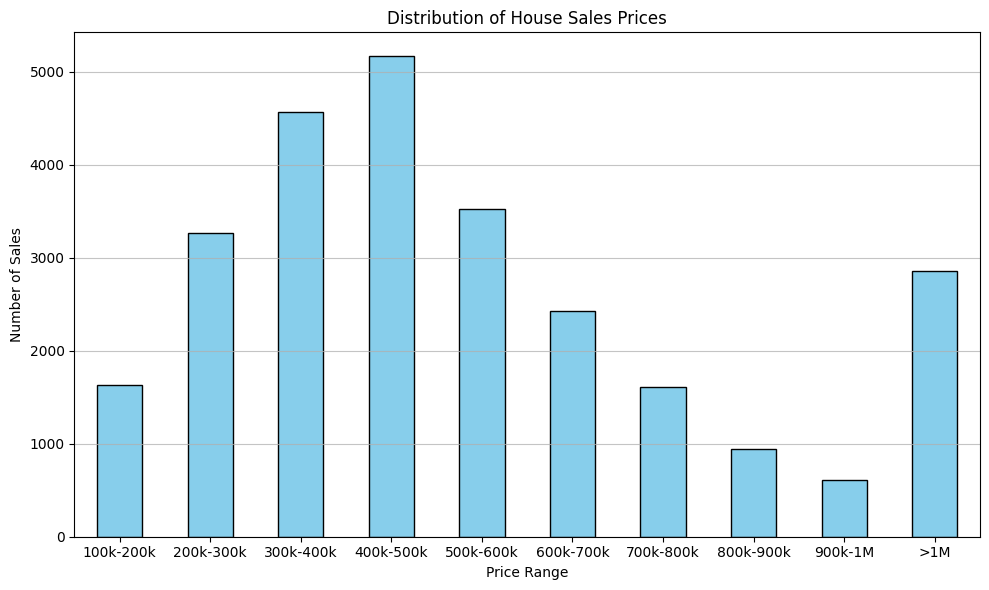

In [878]:
# Defining custom bins

bins = [-float('inf'), 200000, 300000, 400000, 500000, 
        600000, 700000, 800000, 900000, 1000000, float('inf')]
labels = ['100k-200k', '200k-300k', '300k-400k', 
          '400k-500k', '500k-600k', '600k-700k', 
          '700k-800k', '800k-900k', '900k-1M', '>1M']

# Creating a new column for binned categories

df['price_range'] = pd.cut(df['sold_price'], bins=bins, labels=labels)

# Count the number of sales in each bin

price_distribution = df['price_range'].value_counts().sort_index()

# Plotting 

plt.figure(figsize=(10, 6))
price_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of House Sales Prices')
plt.xlabel('Price Range')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

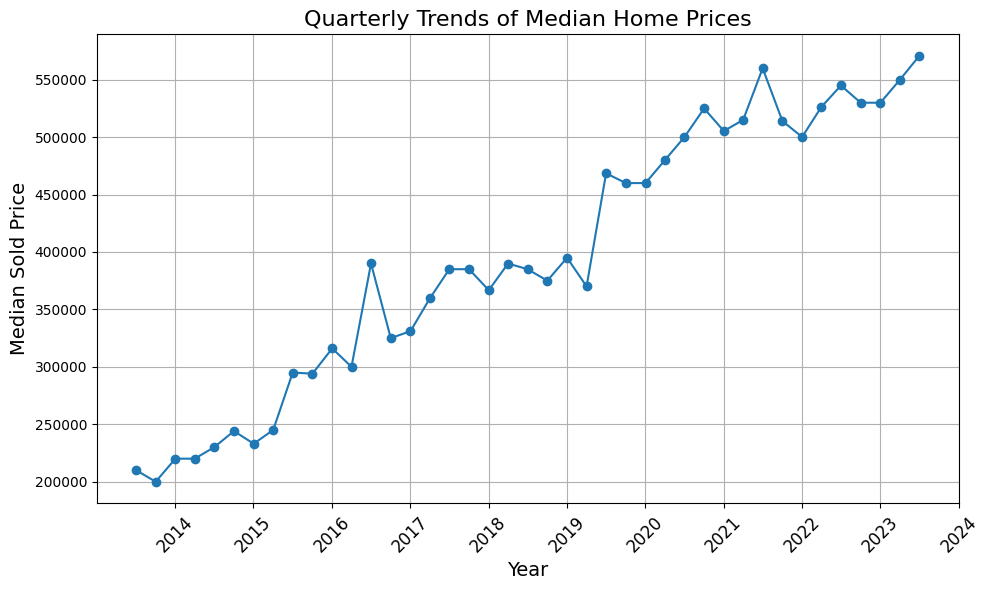

In [879]:
# Converting date strings to datetime format (MM/DD/YYYY)

df['last_sold_date'] = pd.to_datetime(df['last_sold_date'], format='%m/%d/%Y')

# Extracting year and quarter for grouping

df['year_quarter'] = df['last_sold_date'].dt.to_period('Q')

# Grouping and calculating median sold price

median_sold_prices = df.groupby('year_quarter')['sold_price'].median().reset_index()

# Plotting 

plt.figure(figsize=(10, 6))
plt.plot(median_sold_prices['year_quarter'].dt.to_timestamp(), median_sold_prices['sold_price'], marker='o')
plt.title('Quarterly Trends of Median Home Prices', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median Sold Price', fontsize=14)

# Seting x-ticks to show only years

years = pd.date_range(start='2014-01-01', end='2024-12-31', freq='YE')
plt.xticks(years, [str(year.year) for year in years], rotation=45, fontsize=12)

plt.grid()
plt.tight_layout()
plt.show()

In [880]:
# Calculating min, median, max price and count

stats_zip = df.groupby(['zip_code', 'city'])['sold_price'].agg(['min', 'median', 'max', 'count']).reset_index()
stats_zip.columns = ['zip', 'city', 'min', 'median', 'max', 'count']

# Filter out zip codes with less than 250 properties listed

filtered_stats = stats_zip[stats_zip['count'] >= 250]

# Getting top 10 and bottom 5 zip codes based on median price

top_10 = filtered_stats.nlargest(10, 'median')
bottom_5 = filtered_stats.nsmallest(5, 'median')

# Display

print("Top 10 Zip Codes by Median Price:")
print(top_10)

print("\nBottom 5 Zip Codes by Median Price:")
print(bottom_5)

Top 10 Zip Codes by Median Price:
      zip             city     min     median       max  count
47  89451  Incline Village   25000  1500000.0  47500000    387
13  89413        Glenbrook  146000  1485000.0  32000000    352
60  89511             Reno   91485  1190000.0   7500000    640
41  89448      Zephyr Cove    7649  1085000.0  12600000    561
11  89411            Genoa    8974   771582.5   6100000    374
56  89509             Reno  100000   660000.0  10325000    670
63  89521             Reno  180000   660000.0  18000000   1000
32  89441           Sparks  308000   640000.0   3148165    425
44  89449        Stateline     500   610500.0   8950000   1028
64  89523             Reno  175000   599000.0  68300000    739

Bottom 5 Zip Codes by Median Price:
      zip         city    min    median        max  count
35  89444   Wellington  50000  230000.0    1225000    281
75  89706  Carson City   4572  320000.0   40750000   1875
65  89701  Carson City   1008  349950.0   21000000   3357
61  

In [881]:
df['style'].unique() # Checking for unique values in the column

array(['CONDOS', 'TOWNHOMES', 'SINGLE_FAMILY', 'MULTI_FAMILY', 'MOBILE',
       'CONDO', 'OTHER', 'COMMERCIAL', 'CONDO_TOWNHOME_ROWHOME_COOP'],
      dtype=object)

In [882]:
# Renaming "CONDO_TOWNHOME_ROWHOME_COOP" to "MULTI_UNIT"
 
df['style'] = df['style'].replace('CONDO_TOWNHOME_ROWHOME_COOP', 'MULTI_UNIT')
df['style'].unique()

array(['CONDOS', 'TOWNHOMES', 'SINGLE_FAMILY', 'MULTI_FAMILY', 'MOBILE',
       'CONDO', 'OTHER', 'COMMERCIAL', 'MULTI_UNIT'], dtype=object)

In [883]:
# Dropping unnecessary columns

df = df.drop(columns=['last_sold_date', 'price_range','year_quarter','city'])

# Encoding categorical variables

df = pd.get_dummies(df, columns=['style'], drop_first=True)
df

,zip_code,beds,total_baths,sqft,year_built,sold_price,price_per_sqft,stories,hoa_fee,parking_garage,style_CONDO,style_CONDOS,style_MOBILE,style_MULTI_FAMILY,style_MULTI_UNIT,style_OTHER,style_SINGLE_FAMILY,style_TOWNHOMES
0,89503,1.0,0.0,570.0,1974,210000,368.0,1.0,540.0,1.0,False,True,False,False,False,False,False,False
2,89502,2.0,1.5,1085.0,1988,400000,369.0,2.0,209.0,2.0,False,False,False,False,False,False,False,True
3,89511,2.0,0.0,1348.0,2005,485000,360.0,3.0,380.0,2.0,False,True,False,False,False,False,False,False
4,89436,3.0,0.0,1706.0,2000,615000,360.0,1.0,58.0,3.0,False,False,False,False,False,False,True,False
5,89509,2.0,0.0,1169.0,1973,400000,342.0,1.0,400.0,2.0,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29259,89411,3.0,2.0,2017.0,2003,420000,208.0,0.0,0.0,3.0,False,False,False,False,False,False,True,False
29260,89410,3.0,2.0,1399.0,2002,277805,199.0,0.0,0.0,3.0,False,False,False,False,False,False,True,False
29261,89413,0.0,0.0,2320.0,1985,630500,272.0,2.0,0.0,0.0,False,False,False,False,False,False,True,False
29262,89449,3.0,3.0,2086.0,1976,537500,258.0,0.0,0.0,2.0,False,False,False,False,False,False,True,False


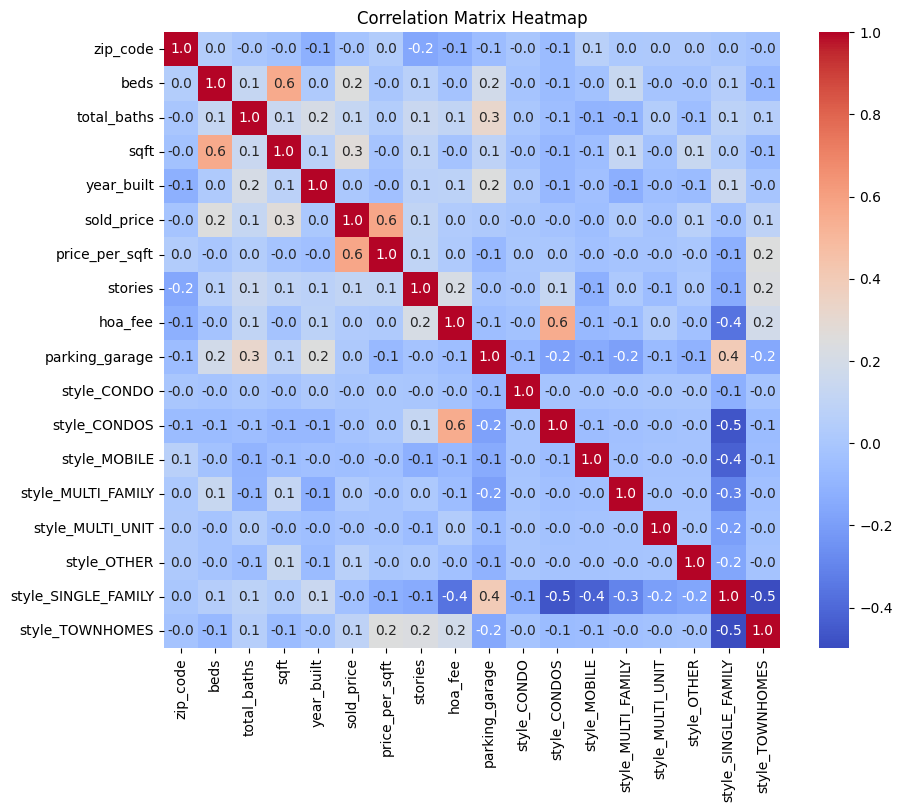

In [884]:
# Performing correlation analysis 

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show() 

In [885]:
# Parameters with the most influence on 'sold_price': 'price_per_sqft', 'sqft' and 'beds'